In [2]:
from cocpit.interpretability.plot import Plot
from cocpit import config as config
import torch
import os
import PIL

%load_ext autoreload
%autoreload 2

predicted: wet


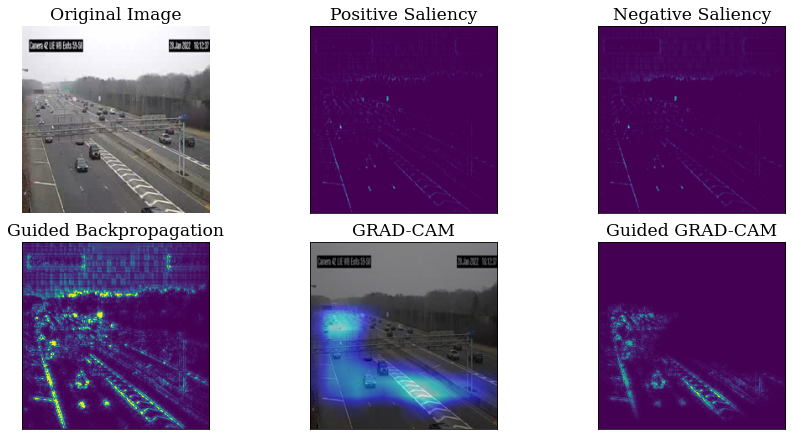

predicted: wet


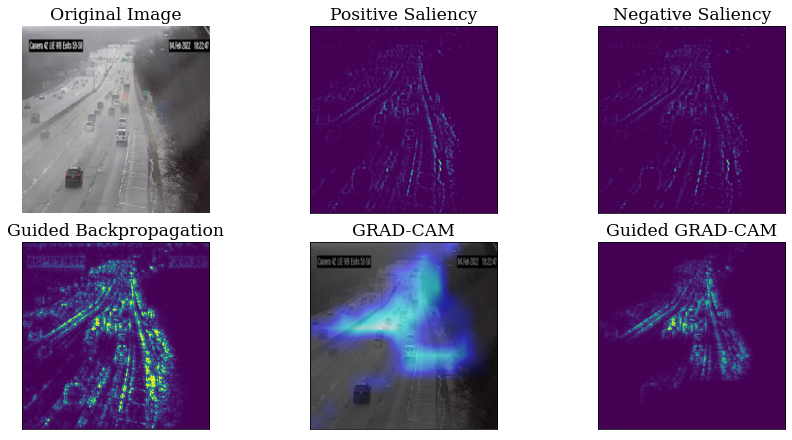

predicted: wet


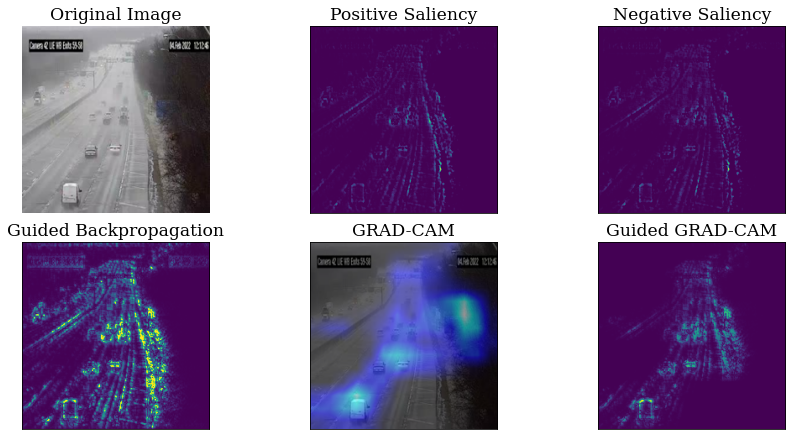

predicted: wet


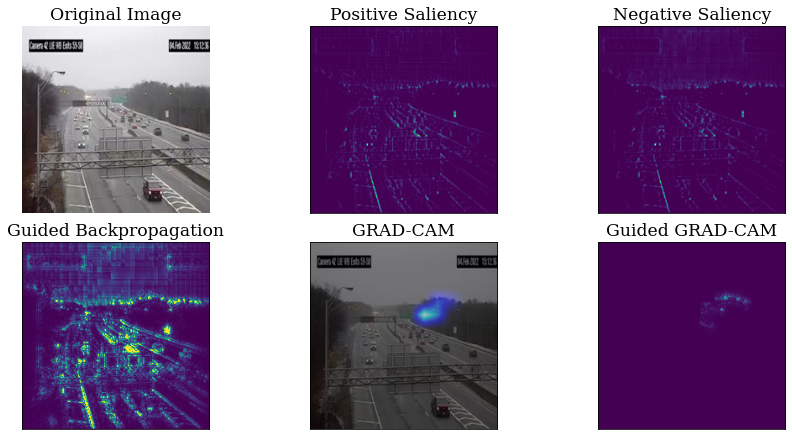

predicted: wet


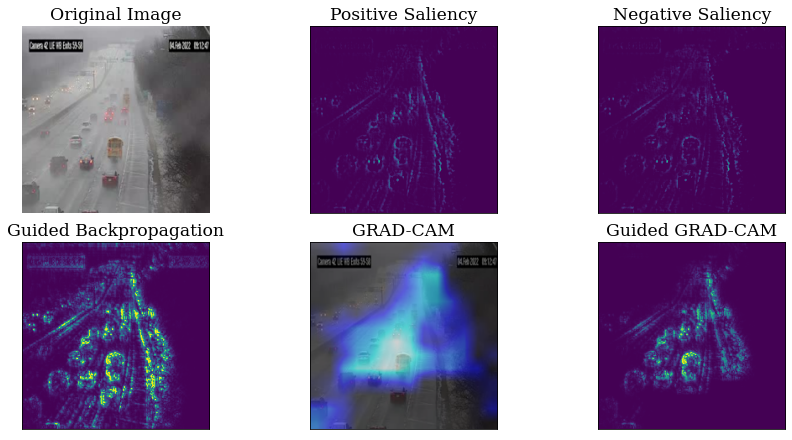

predicted: wet


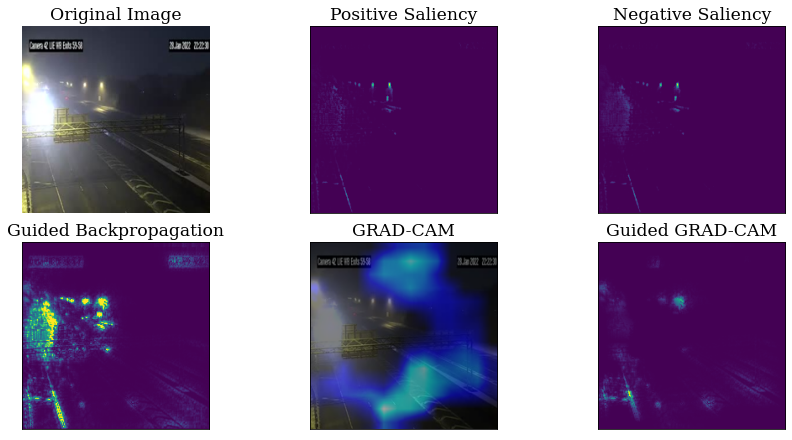

predicted: wet


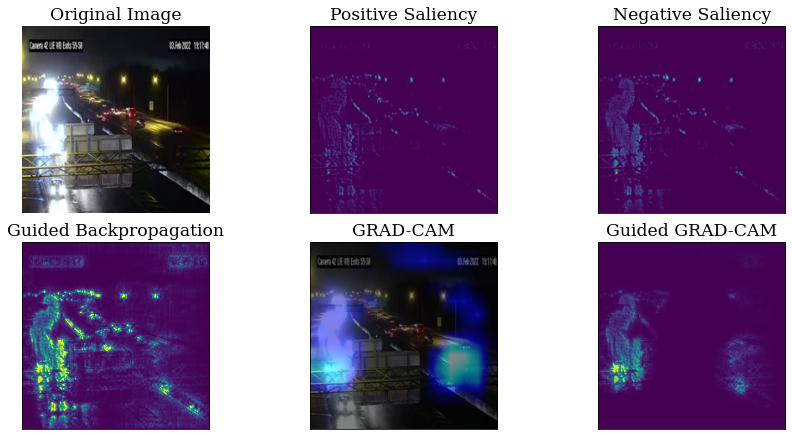

predicted: wet


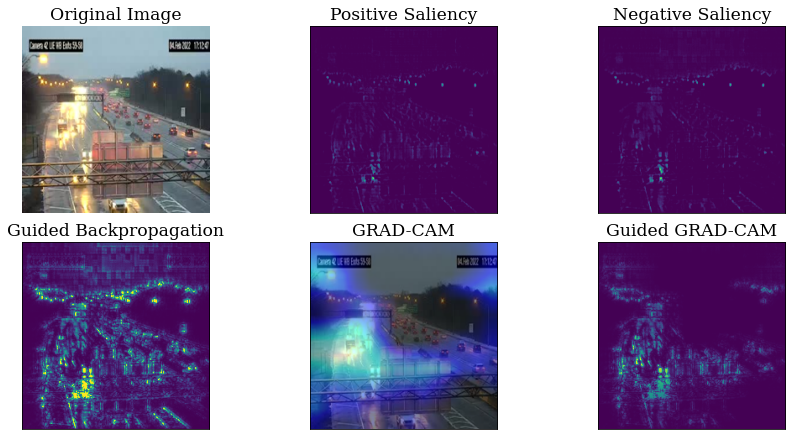

predicted: wet


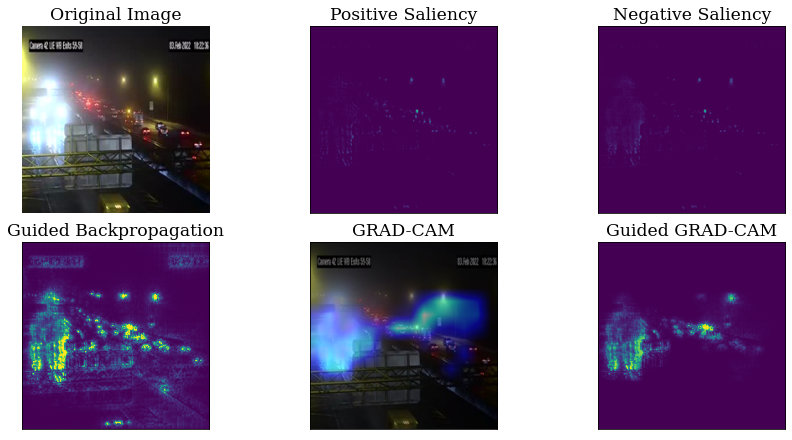

predicted: wet


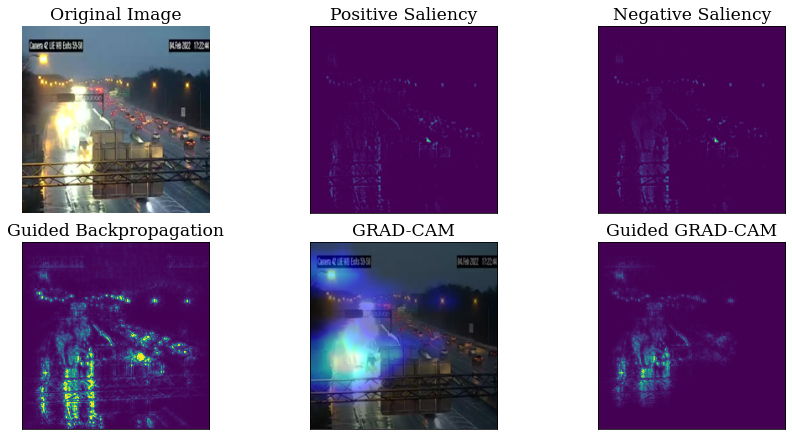

predicted: wet


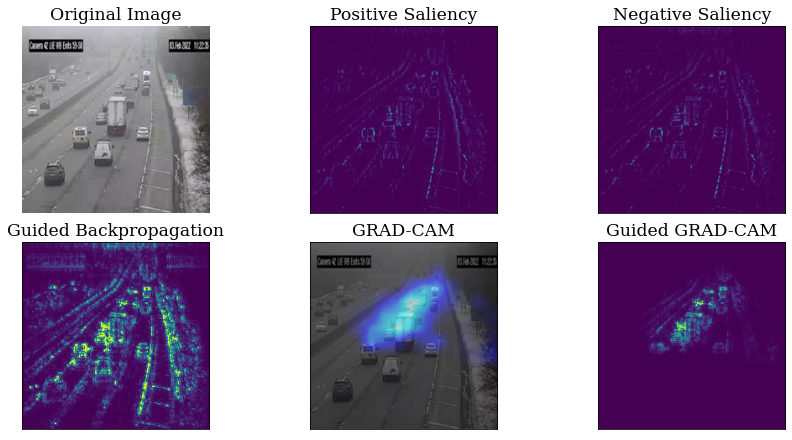

predicted: wet


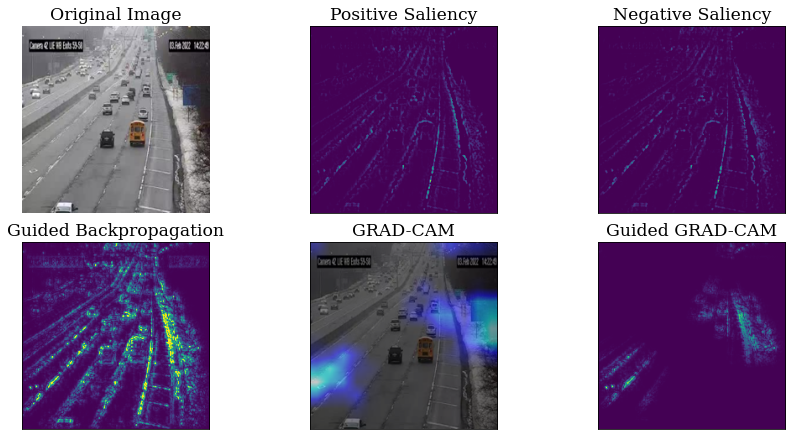

predicted: wet


KeyboardInterrupt: 

In [4]:
model = torch.load(
    "/DRIVE_PYTORCH/saved_models/v0.0.0/e[25]_bs[64]_k0_1model(s).pt"
).to(config.DEVICE)
basedir = "/DRIVE/site_analysis/corridor_LIE_east/gui_label/Skyline_1878/wet/"
for image in os.listdir(basedir):
    image = PIL.Image.open(f"{basedir}/{image}").resize((224, 224))
    p = Plot(model, image)
    p.interp_runner(image)
    fig = p.make_plots()
    fig.show()
    fig.close()